## Exploratory Data Analysis

### Role to explore

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Update job_locations in Vietnam
replacement_list={'Da Nang': 'Da Nang', 'Hanoi': 'Hanoi', 'Binh Duong':'Binh Duong','Ho Chi Minh':'HCM City','Bac Giang':'Bac Giang','Dong Nai':'Dong Nai','Bình Định':'Binh Dinh','Quảng Nam':'Quang Nam'}

for city, replacement in replacement_list.items():    
  df['job_location'] = np.where(
        df['job_location'].str.contains(city, case=False, na=False),
        replacement,
        df['job_location']
    )

df['job_location'] = np.where(df['job_location'] =='Vietnam', 'Unknown', df['job_location'])

In [3]:
df_DA = df[df['job_title_short']=='Data Analyst'].copy()

In [4]:
# Top job locations
#fig, ax = plt.subplots(1,2)
country_list = ['United States','Vietnam']
df_DA_country = df_DA[df_DA['job_country'].isin(country_list)]
df_location_counts = df_DA_country.groupby('job_country')['job_location'].value_counts().to_frame()
df_location_counts

count
job_country   job_location                              
United States Anywhere                              5106
              New York, NY                          3035
              Atlanta, GA                           2741
              Chicago, IL                           2337
              Austin, TX                            1919
...                                                  ...
Vietnam       Binh Dinh                                1
              Quang Nam                                1
              Thua Thien Hue, Vietnam (+3 others)      1
              Vietnam  (+1 other)                      1
              Vietnam (+1 other)                       1

[3233 rows x 1 columns]

In [5]:
df_location_us = df_location_counts.loc['United States'].head(10).copy()
df_location_vn = df_location_counts.loc['Vietnam'].head(10).copy()
df_location_vn

,count
job_location,
HCM City,122
Unknown,91
Hanoi,70
Da Nang,20
Anywhere,19
Binh Duong,4
Dong Nai,2
Bac Giang,1
Binh Dinh,1


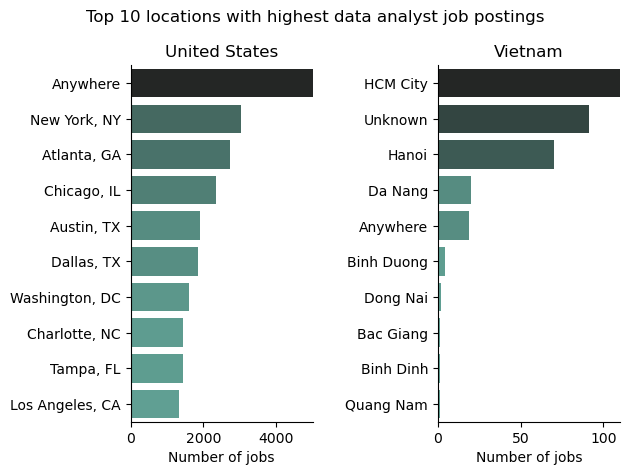

In [6]:
# Plotting
fig,ax = plt.subplots(1,2)
figsize=(12,6)

# US
sns.barplot(df_location_us, x='count', y='job_location', legend=False, hue = 'count', palette ='dark:#5A9_r', ax=ax[0])
sns.despine(ax=ax[0])

ax[0].set_xlabel('Number of jobs')
ax[0].set_title('United States')
ax[0].set_ylabel('')
ax[0].set_xlim(0,5000)

#VN
sns.barplot(df_location_vn, x='count', y='job_location', legend=False, hue = 'count', palette ='dark:#5A9_r', ax=ax[1])
sns.despine(ax=ax[1])

ax[1].set_xlabel('Number of jobs')
ax[1].set_title('Vietnam')
ax[1].set_ylabel('')
ax[1].set_xlim(0,110)


fig.suptitle('Top 10 locations with highest data analyst job postings')
fig.tight_layout()
plt.show()

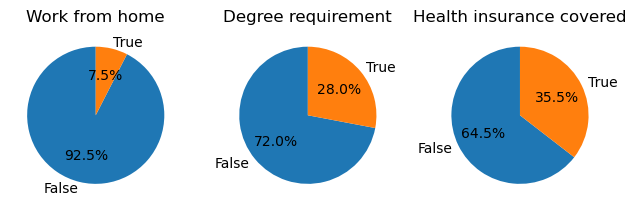

In [123]:
# Data Analyst job benefits

dict_column = {'job_work_from_home': 'Work from home', 'job_no_degree_mention': 'Degree requirement', 'job_health_insurance': 'Health insurance covered'}
fig, ax = plt.subplots(1,3)

for i, (column, title) in enumerate(dict_column.items()): # .items is used to get the key-value pair from the dictionary
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels =['False', 'True'])
    ax[i].set_title(title)


fig.tight_layout()

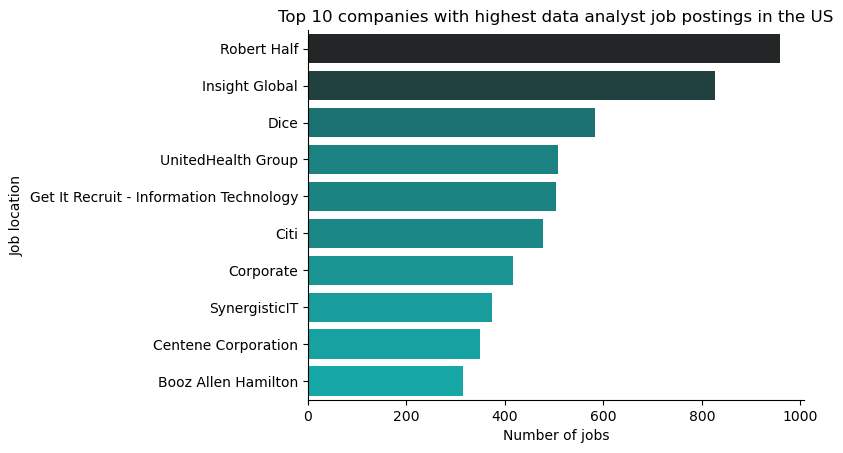

In [7]:
# Top companies in the US:
df_top_company_us = df_DA_country[df_DA_country['job_country']=='United States'].company_name.value_counts().sort_values(ascending=False).head(10).to_frame()

sns.barplot(df_top_company_us, x='count', y='company_name', legend=False, hue = 'count', palette ='dark:c_r')
sns.despine()  #remove the plot border
plt.ylabel('Job location')
plt.xlabel('Number of jobs')
plt.title('Top 10 companies with highest data analyst job postings in the US')
plt.show()

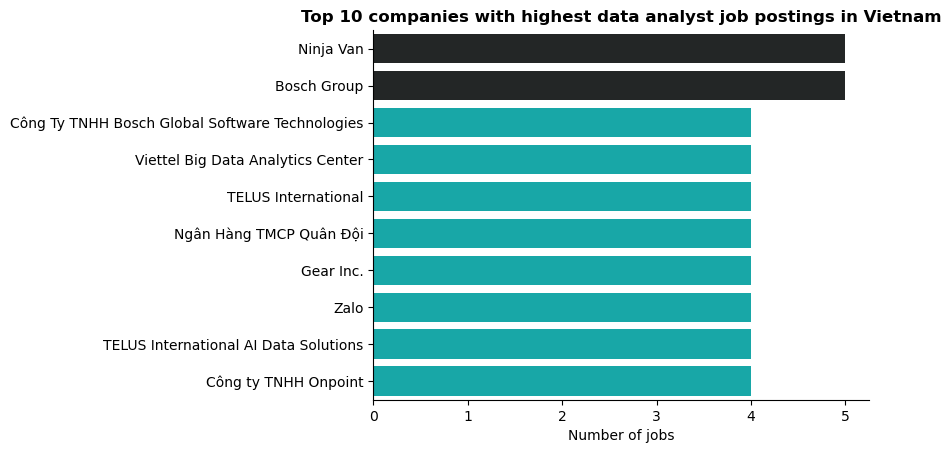

In [8]:
# Top companies in Vietnam:
df_top_company_vn = df_DA_country[df_DA_country['job_country']=='Vietnam'].company_name.value_counts().sort_values(ascending=False).head(10).to_frame()

sns.barplot(df_top_company_vn, x='count', y='company_name', legend=False, hue = 'count', palette ='dark:c_r')
sns.despine()
plt.ylabel('')
plt.xlabel('Number of jobs')
plt.title('Top 10 companies with highest data analyst job postings in Vietnam', fontweight = 'bold')
plt.show()